# Concevez une application au service de la santé publique. 

Idée d'application : lorsque l'utilisateur scanne un produit, l'application lui propose une alternative sans allergène, la plus saine possible (peu d'additifs, sans huile de palme avec un bon Nutri-Score : faible en énergie, en glucide, en graisse, en sel, riche en fibres et en protéines) vendue en France.

## Exploration du jeu de données

J'importe les librairies nécessaires.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Je lis mon fichier data.csv nettoyé.

In [2]:
data = pd.read_csv("data.csv")
data.head()

,Unnamed: 0,code,product_name,countries_fr,main_category_fr,allergens,nutrition_grade_fr,energy_100g,proteins_100g,carbohydrates_100g,fat_100g,sodium_100g,fiber_100g,additives_n,ingredients_from_palm_oil_n
0,15,40608754,"Pepsi, Nouveau goût !",France,Sodas,NaN,e,177.0,0.0,10.4,0.0,0.010000,0.0,2.0,0.0
1,20,10,Madeleines nature,France,Gâteaux,"blé, oeufs, blé, lait",d,1900.0,6.0,55.0,23.0,0.259843,1.5,5.0,0.0
2,22,30,Cakes Raisins,France,Gâteaux,"blé, œufs, blé, lait",d,1768.0,5.8,56.0,19.0,0.255906,1.8,5.0,0.0
3,23,31,Cakes aux Fruits,France,Pâtisseries,NaN,d,1670.0,4.9,60.0,15.0,0.236220,1.5,11.0,0.0
4,25,50,Financiers aux Amandes,France,Pâtisseries,"œufs, amande, beurre, blé, œufs, blé",e,1868.0,8.0,51.0,23.0,0.216535,1.7,3.0,0.0


### 1) Analyse univariée

Je commence par analyser le mode des variables "main_category_fr" et "ingredients_text" pour voir quelle est la catégorie ainsi que l'allergène les plus présents dans mon jeu de données.

In [3]:
mode_category = data["main_category_fr"].mode().sum()
mode_ingredients = data["allergens"].mode().sum()

print("La catégorie la plus présente est : ", mode_category)
print("L'allergène le plus présent est : ", mode_ingredients)

La catégorie la plus présente est :  Conserves
L'allergène le plus présent est :  blé


J'affiche le top 10 des catégories les plus fréquentes à l'aide d'un diagramme en barres.

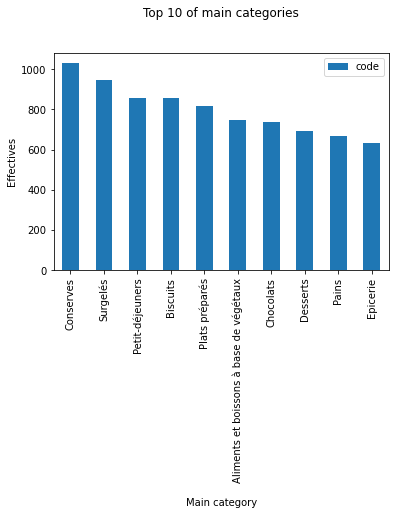

In [35]:
count = data.loc[:, ['main_category_fr', "code"]].groupby('main_category_fr').count().reset_index()
count = count.sort_values("code", ascending = False)
count = count.iloc[:10, :]
count.plot.bar(x = "main_category_fr", y = "code")
plt.title("Top 10 of main categories\n\n")
plt.xlabel("\nMain category")
plt.ylabel("Effectives")
plt.show()

Je génère ensuite les boîtes à moustache de chaque variable en cachant les outliers pour plus de lisibilité et en faisant apparaître la moyenne.

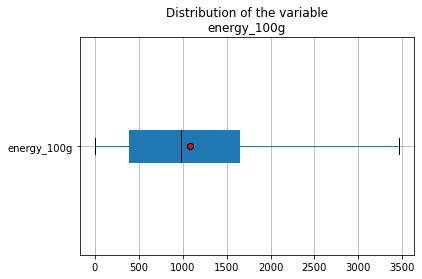

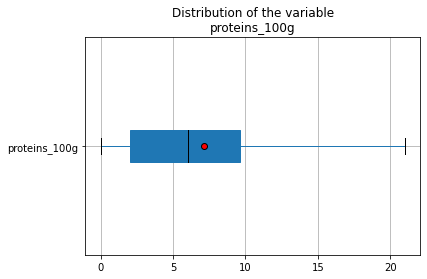

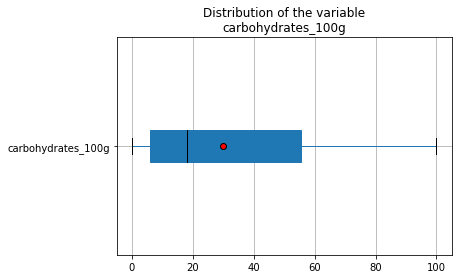

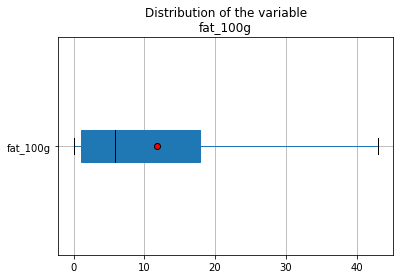

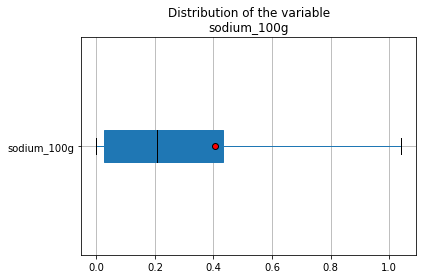

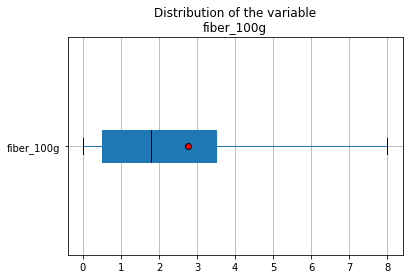

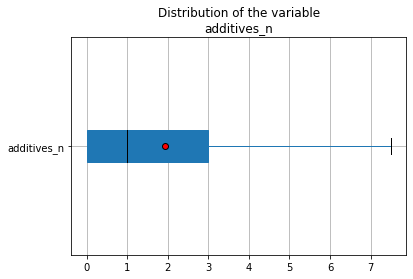

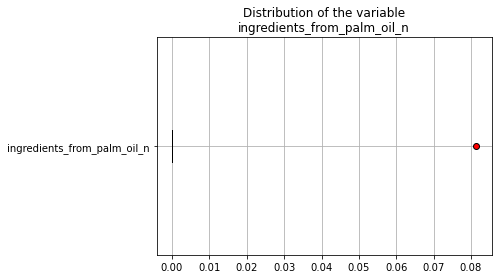

In [4]:
lst = ["energy_100g", "proteins_100g", "carbohydrates_100g", "fat_100g", "sodium_100g", "fiber_100g", "additives_n", "ingredients_from_palm_oil_n"]
for i in lst:
    data.boxplot(column = i, showfliers=False, vert = False, showmeans = True, patch_artist = True, medianprops = {"color" : "black"}, meanprops = {"marker" : "o", "markeredgecolor" : "black", "markerfacecolor" : "red"})
    plt.title("Distribution of the variable\n" + i)
    plt.show()

### 2) Analyse bivariée

Je génère un pairplot avec mes variables numériques.

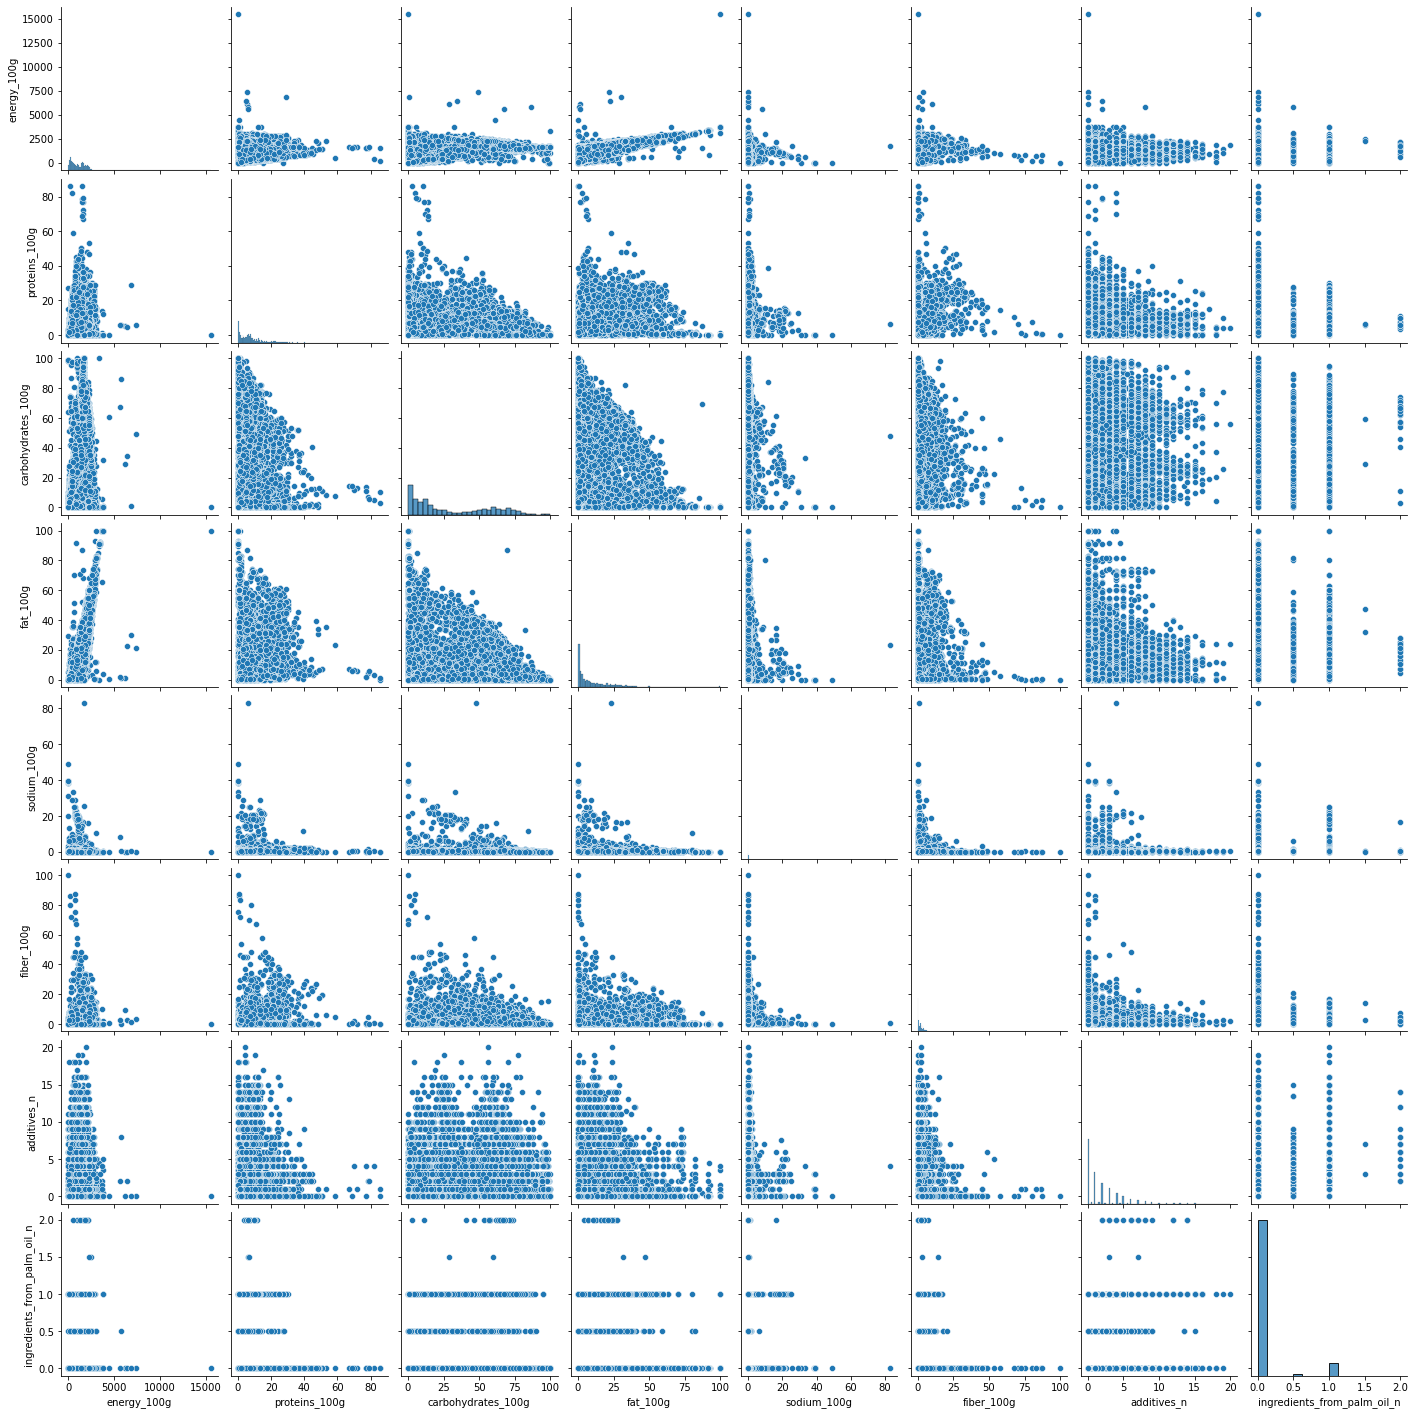

In [5]:
data_ = data.loc[:, ["energy_100g", "proteins_100g", "carbohydrates_100g", "fat_100g", "sodium_100g", "fiber_100g", "additives_n", "ingredients_from_palm_oil_n"]]
sns.pairplot(data_)
plt.show(block = True)

Ces diagrammes sont assez illisibles, je vais donc générer les deux diagrammes de dispersion les plus pertinents.

Je commence par générer le diagramme de dispersion entre l'energie et les graisses.

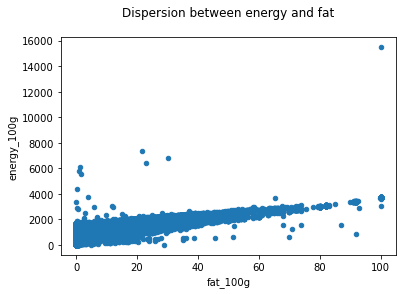

In [7]:
data.plot.scatter(x = "fat_100g",y = "energy_100g")
plt.title("Dispersion between energy and fat\n")
plt.show()

J'analyse ensuite le coefficient de corrélation et la covariance entre l'énergie et les graisses.

In [8]:
corr = st.pearsonr(data["fat_100g"], data["energy_100g"])[0]
print("Le coefficient de corrélation entre l'énergie et les graisses est :", corr)
cov = np.cov((data["fat_100g"], data["energy_100g"]),ddof=0)[1,0]
print("La covariance entre l'énergie et les graisses est :", cov)

Le coefficient de corrélation entre l'énergie et les graisses est : 0.7666426883126896
La covariance entre l'énergie et les graisses est : 9114.073170552025


Le coefficient de corrélation est plus proche de 1 que de 0, donc les variables sont fortement corrélées.
La covariance est positive, cela signifie que les variables varient dans le même sens.

Je génère ensuite le diagramme de dispersion entre l'energie et les glucides.

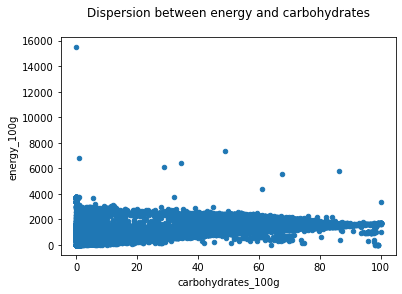

In [9]:
data.plot.scatter(x = "carbohydrates_100g",y = "energy_100g")
plt.title("Dispersion between energy and carbohydrates\n")
plt.show()

J'analyse ensuite le coefficient de corrélation et la covariance entre l'energie et les glucides.

In [10]:
corr = st.pearsonr(data["carbohydrates_100g"], data["energy_100g"])[0]
print("Le coefficient de corrélation entre l'énergie et les glucides est :", corr)
cov = np.cov((data["carbohydrates_100g"], data["energy_100g"]),ddof=0)[1,0]
print("La covariance entre l'énergie et les glucides est :", cov)

Le coefficient de corrélation entre l'énergie et les glucides est : 0.5855988577726496
La covariance entre l'énergie et les glucides est : 12228.449168725008


Le coefficient de corrélation est plus proche de 1 que de 0, donc les variables sont fortement corrélées.
La covariance est positive, cela signifie que les variables varient dans le même sens.

Je vais ensuite ajouter une colonne "conditions" qui est égale à la somme de mes conditions vérifiées.
Une conditions vérifiée revoie 1 et 0 dans l'autre cas.
Mes conditions sont : strictement moins de 4 additifs, sans huile de palme, sans allergène, avec un Nutri-Score égale à 'a' ou 'b'.
J'ajoute quand même une colonne concernant la présence d'allergène pour faire une autre analyse après.
A noter : si un produit ne contient pas d'allergène, il sera classé 1, sinon 0.

In [11]:
data["conditions"] = data["additives_n"].apply(lambda x:1 if x<4 else 0) + data["ingredients_from_palm_oil_n"].apply(lambda x:1 if x==0 else 0) + data["allergens"].apply(lambda x:1 if x is np.nan else 0) + data["nutrition_grade_fr"].apply(lambda x:1 if x == 'a' or x == 'b' else 0) 
data["allergen"] = data["allergens"].apply(lambda x:1 if x is np.nan else 0)

Je filtre mon DataFrame en gardant les produits qui vérifient toutes mes conditions, c'est à dire que je garde seulement les lignes dont la colonne "conditions" est égal à 4.

In [12]:
data.loc[(data["conditions"] == 4)]

,Unnamed: 0,code,product_name,countries_fr,main_category_fr,allergens,nutrition_grade_fr,energy_100g,proteins_100g,carbohydrates_100g,fat_100g,sodium_100g,fiber_100g,additives_n,ingredients_from_palm_oil_n,conditions,allergen
7,48,18210,Carrot & Coriander soup,France,en:Carrot-coriander-soup,NaN,b,126.0,0.30,3.6,1.40,0.248031,1.0,0.0,0.0,4,1
10,56,31858,Pur Soup' Velouté de légumes,France,Soupes,NaN,b,188.0,0.80,5.3,2.10,0.295276,0.8,1.0,0.0,4,1
11,64,83164,NaN,France,NaN,NaN,a,586.0,9.30,16.2,3.80,0.236220,1.5,0.5,0.0,4,1
20,133,159944,Chef's style carrots,France,NaN,NaN,a,155.0,0.70,5.9,0.50,0.098425,3.0,1.0,0.0,4,1
25,154,16229910204,Soupe Tom Yum aux légumes,France,Soupes,NaN,b,307.0,1.33,5.0,5.33,0.247000,2.0,1.0,0.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22520,71664,8717496900142,Pois chiches Bio,France,Conserves,NaN,a,420.0,5.90,15.4,0.30,0.236220,5.9,0.0,0.0,4,1
22521,71665,8717496900159,Mix de haricots,France,Conserves,NaN,a,339.0,4.90,10.2,0.40,0.314961,8.4,0.0,0.0,4,1
22522,71666,8717496900425,Lentilles,France,Conserves,NaN,a,423.0,7.20,14.2,0.40,0.275591,5.6,0.0,0.0,4,1
22523,71670,8717496903907,Maïs doux en grains sous vide,France,Conserves,NaN,a,420.0,2.40,17.4,1.70,0.118110,2.5,0.0,0.0,4,1


Je génère un diagramme en violon pour étudier la répartition de l'énergie par rapport au Nutri-Score.

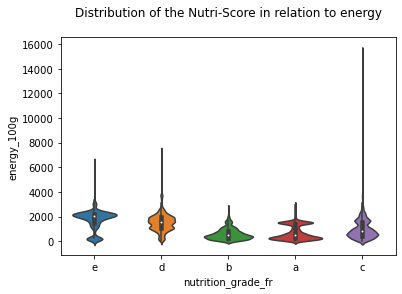

In [13]:
sns.violinplot(x = data["nutrition_grade_fr"], y = data["energy_100g"])
plt.title("Distribution of the Nutri-Score in relation to energy\n")
plt.show(block = False)

On constate que plus le Nutri-Score est mauvais, plus le produit est riche en énergie.

Je génère un diagramme en violon pour étudier la répartition des additifs par rapport à la présence d'allergène.

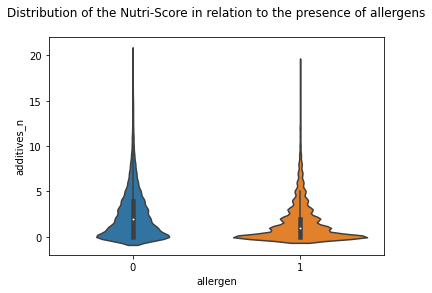

In [15]:
sns.violinplot(x = data["allergen"], y = data["additives_n"])
plt.title("Distribution of the Nutri-Score in relation to the presence of allergens\n")
plt.show(block = True)

On constate que les produits contenant des allergènes contiennent plus d'additifs.

J'ajoute un histogramme pour étudier la répartition des allergènes selon le Nutri-Score.

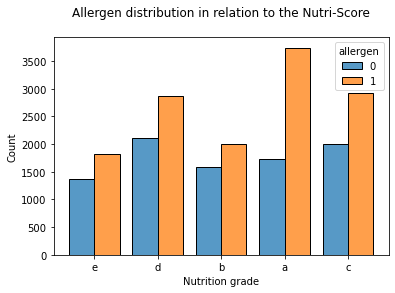

In [16]:
sns.histplot(data = data, x="nutrition_grade_fr", hue = "allergen", multiple="dodge", shrink=0.8)
plt.title("Allergen distribution in relation to the Nutri-Score\n")
plt.xlabel("Nutrition grade")
plt.show(block = True)

On remarque qu'il y a plus de produit sans allergène qu'avec, surtout pour le nutri score 'a', ce qui est une bonne chose pour l'application.

### 3) Analyse multivariée

Je vais réaliser une ACP sur toutes mes données numériques.

Je commence par centrer-réduire toutes mes variables numériques.
D'abord, je génère un DataFrame contenant seulement mes valeurs nutritionnelles.

In [17]:
data_acp = data.loc[:, ["energy_100g", "proteins_100g", "carbohydrates_100g", "fat_100g", "sodium_100g", "fiber_100g", "additives_n", "ingredients_from_palm_oil_n"]]

J'applique le scaler aux valeurs de mon DataFrame.

In [18]:
scaler = StandardScaler()
scaler.fit(data_acp)
X_scaled = scaler.transform(data_acp)
X_scaled = scaler.fit_transform(data_acp)
X_scaled = pd.DataFrame(X_scaled)

Je vérifie que les moyennes soient égales à 0 et les écarts-types à 1 (arrondis au centième).

In [19]:
X_scaled.describe().round(2)

,0,1,2,3,4,5,6,7
count,22525.00,22525.00,22525.00,22525.00,22525.00,22525.00,22525.00,22525.00
mean,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.40,-1.06,-1.10,-0.77,-0.24,-0.70,-0.78,-0.30
25%,-0.89,-0.76,-0.88,-0.70,-0.22,-0.57,-0.78,-0.30
50%,-0.13,-0.17,-0.44,-0.39,-0.12,-0.25,-0.38,-0.30
75%,0.73,0.37,0.95,0.40,0.02,0.18,0.43,-0.30
max,18.63,11.68,2.60,5.74,48.66,24.47,7.28,7.03


Je vais travailler sur mes 8 composantes.

In [21]:
n_components = 8

J'instancie mon ACP.

In [22]:
pca = PCA(n_components = n_components)

Je l'entraîne sur les données centrées-reduites.

In [23]:
pca.fit(X_scaled)

PCA(n_components=8)

On s'intéresse à la variance captée par chaque nouvelle composante.

In [24]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([28.46, 16.73, 14.26, 12.53, 10.68,  8.81,  8.25,  0.29])

Je calcule la somme cumulée.

In [25]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 28.,  45.,  59.,  72.,  83.,  91., 100., 100.])

Je définis une variable avec la liste de mes composantes.

In [26]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8]

Je l'affiche dans un graphique.

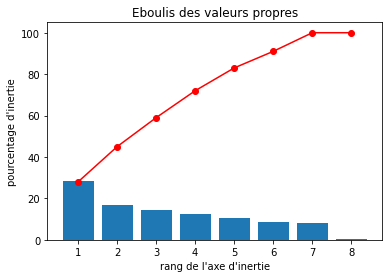

In [27]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

En bleu, on a la variance de chaque nouvelle composante et en rouge la variance cumulée.
Avec F1 et F2 on a environ 40% des informations, je vais donc trvailler avec F1 et F2 pour la suite.

On s'intéresse  maintenant aux composantes.

In [28]:
pcs = pd.DataFrame(pca.components_)
pcs

,0,1,2,3,4,5,6,7
0,0.633676,0.236442,0.401933,0.465596,-0.009890,0.277490,0.099776,0.277788
1,0.052334,0.441608,-0.231734,0.145611,0.013661,0.321486,-0.605417,-0.507219
2,0.060279,0.209757,-0.523343,0.469622,0.457154,-0.458446,0.187210,0.061048
3,-0.139082,0.263108,0.172482,-0.385918,0.769004,0.331398,0.082654,0.157236
4,0.179436,-0.639483,0.254289,0.160794,0.431461,-0.178969,-0.481488,-0.135375
5,0.148943,0.042824,0.297396,-0.036470,0.094388,-0.142996,0.500231,-0.778858
6,-0.074927,-0.462631,-0.381960,0.267898,0.065462,0.668361,0.315498,-0.110298
7,0.716061,-0.105137,-0.426745,-0.541836,-0.002267,-0.021572,0.005864,0.001031


On continue.

In [29]:
features = data_acp.columns
pcs.columns = features 
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,energy_100g,proteins_100g,carbohydrates_100g,fat_100g,sodium_100g,fiber_100g,additives_n,ingredients_from_palm_oil_n
F1,0.63,0.24,0.40,0.47,-0.01,0.28,0.10,0.28
F2,0.05,0.44,-0.23,0.15,0.01,0.32,-0.61,-0.51
F3,0.06,0.21,-0.52,0.47,0.46,-0.46,0.19,0.06
F4,-0.14,0.26,0.17,-0.39,0.77,0.33,0.08,0.16
F5,0.18,-0.64,0.25,0.16,0.43,-0.18,-0.48,-0.14
F6,0.15,0.04,0.30,-0.04,0.09,-0.14,0.50,-0.78
F7,-0.07,-0.46,-0.38,0.27,0.07,0.67,0.32,-0.11
F8,0.72,-0.11,-0.43,-0.54,-0.00,-0.02,0.01,0.00


Pour une représentation plus visuelle.

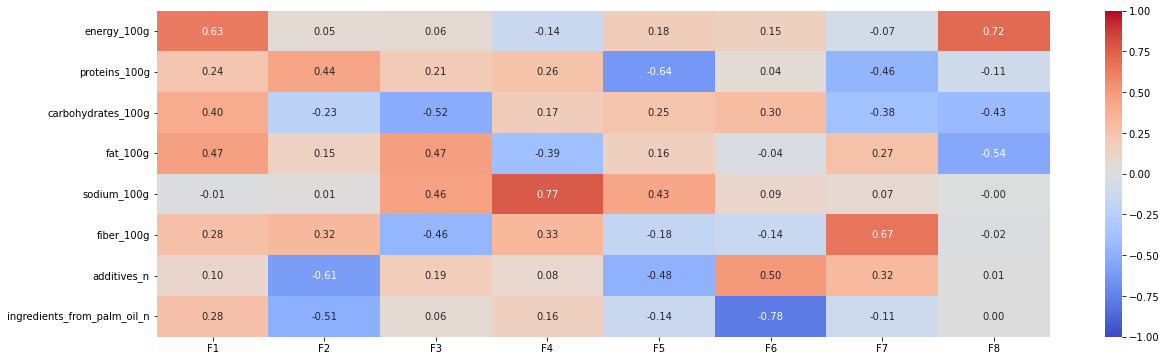

In [30]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.show(block=False)

Je génère ensuite le cercle de corrélation.

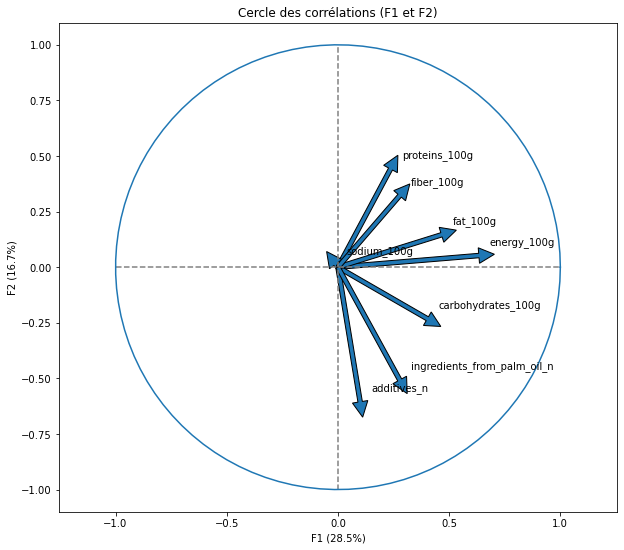

In [31]:
x, y = 0, 1
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Les flèches commencent à l'origine
             pca.components_[0, i],  #0 pour PC1
             pca.components_[1, i],  #1 pour PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  
plt.axis('equal')
plt.show(block=False)

On travaille maintenant sur la projection de nos dimensions. On calcule les coordonnées de nos individus dans notre nouvel espace.

In [32]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-1.90818994e+00, -5.63923901e-01, -7.65671963e-02,
        -3.99385996e-01,  2.13545685e-01, -8.27404664e-02,
         2.03861388e-01,  1.13190298e-02],
       [ 1.29826607e+00, -8.28440566e-01,  2.03096840e-01,
        -4.29656737e-01,  1.19093917e-01,  1.28865902e+00,
         3.92560528e-02, -2.52944929e-03],
       [ 1.09781253e+00, -8.72668335e-01,  9.38493183e-03,
        -2.83696590e-01,  6.04752544e-02,  1.27143728e+00,
         3.22504577e-02,  1.83133704e-03],
       [ 1.14487406e+00, -2.49918683e+00,  2.56270491e-01,
        -9.23826138e-03, -1.03730516e+00,  2.52003895e+00,
         6.89081623e-01,  1.86541181e-02],
       [ 1.21633901e+00, -1.61498796e-01,  1.54556473e-01,
        -4.41072923e-01,  2.52752886e-01,  8.38213455e-01,
        -2.60537818e-01, -5.88016587e-03]])

In [33]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):


    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    plt.scatter(   X_[:, x], 
                        X_[:, y], 
                        alpha=alpha, 
                        c=c, 
                        cmap="Set1", 
                        marker=marker)


    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()


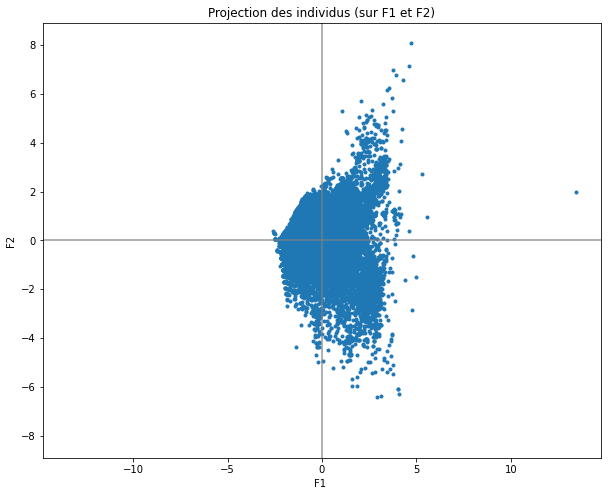

In [34]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y)

### 4) Conclusion

Pour conclure, il y a peu de produits vérifiant toutes les conditions que j’avais exigé, il faut peut être avoir des conditions moins strictes. Par exemple: permettre plus d’additifs ou autoriser le Nutri-Score ‘c’.
Il y a aussi trop de valeurs manquantes concernant la variable allergène. Si les allergènes étaient mieux renseignés on aurait plus de précision sur les résultats donc plus de résultats.
Les données sont souvent entrées par des utilisateurs de l’application OpenFoodFact, elles ne sont donc pas forcément fiables à 100%, c’est cela qui donne naissance à des outliers qui peuvent fausser l’étude.
L’idée d’application reste pertinente, car il y a beaucoup de produits sans allergènes disponibles.
 
